In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data/maps-synthetic-data-v1.1.csv',index_col=0)

In [7]:
# The length of the dataset
len(df)

13734

# Exploratory data analysis

In [8]:
# Describe of the features that is numerical
df.describe()

X       mat_dep    weight_16    height_16           iq  \
count  13734.000000  11145.000000  5351.000000  5364.000000  7288.000000   
mean    6867.500000      5.415882    61.720509   169.286372   103.672201   
std     3964.808633      4.611888    12.003745     8.533072    16.682292   
min        1.000000      0.000000    32.300000   139.512169    45.000000   
25%     3434.250000      2.000000    53.785885   163.317270    92.000000   
50%     6867.500000      4.000000    59.890308   168.875015   103.000000   
75%    10300.750000      8.000000    67.309938   175.171323   115.000000   
max    13734.000000     28.000000   126.029499   201.519622   152.000000   

          agg_score        parity    secd_diag    prim_diag  panic_score  \
count  10714.000000  12544.000000  4513.000000  4513.000000  4513.000000   
mean       9.947639      0.843033     0.417682     1.301573     0.043209   
std        1.996768      1.009716     1.514679     3.200335     0.320880   
min        3.000000      0.000000     0.000000     0.000000     0.000000   
25%        9.000000      0.000000     0.000000     0.000000     0.000000   
50%       10.000000      1.000000     0.000000     0.000000     0.000000   
75%       11.000000      1.000000     0.000000     0.000000     0.000000   
max       15.000000     22.000000     9.000000    12.000000     4.000000   

       dep_thoughts    dep_score  
count   1805.000000  4513.000000  
mean       1.932410     0.437625  
std        1.327217     0.928123  
min        0.000000     0.000000  
25%        1.000000     0.000000  
50%        1.000000     0.000000  
75%        3.000000     0.000000  
max        5.000000     4.000000

Text(0, 0.5, 'number of features')

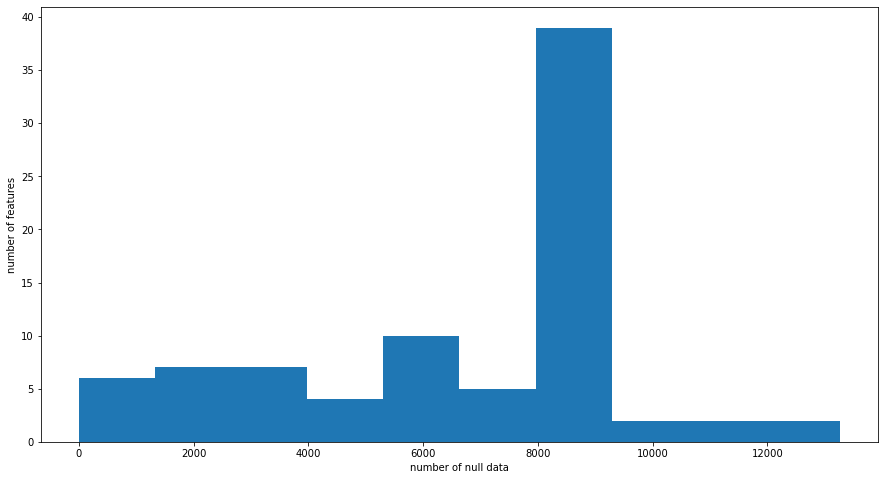

In [9]:
# Find the number of null data in each features
num_null_data = ((len(df) - df.count())).tolist()

# Plot histogram
plt.figure(figsize=(15,8))
plt.hist(num_null_data)
plt.xlabel('number of null data')
plt.ylabel('number of features')

### interactive inspection

In [15]:
# Create function for correlation_matrix where values are categorical

def correlation_matrix_categorical(df,x,y,positional=None,limit=50,graph=False):
    
    df_length = df.shape[0]
    df = df[[x,y]].dropna()

    available_values = 0
    idx = df[x].unique()
    col = df[y].unique()
    idx_length = df[x].unique().shape[0]
    col_length = df[y].unique().shape[0]
    
    if (idx_length > limit) | (col_length > limit):
        raise Exception("Too many unique values")

    matrix = np.zeros((idx_length,col_length))
    
    # Filling matrix
    for i in range(idx_length):
        for c in range(col_length):

            num = df[(df[x] == idx[i]) & (df[y] == col[c])].shape[0]
            available_values += num

            if positional == True:
                num /= df[(df[x] == idx[i])].shape[0]
            elif positional == False:
                num /= df.shape[0]

            matrix[i,c] = num
            
    print(f'percentage that the values is available : {round(available_values/df_length*100,2)}%') 
    
    mat = pd.DataFrame(matrix,index=idx,columns=col)

    return mat
        

In [16]:
# Here are the column name that you can use
df.columns

Index(['X', 'flag', 'comp_bed_9', 'mat_dep', 'mat_age', 'weight_16',
       'height_16', 'iq', 'comp_noint_bed_16', 'comp_int_bed_16',
       'talk_phon_wend', 'text_wend', 'talk_mob_wend', 'comp_wend',
       'musi_wend', 'read_wend', 'work_wend', 'alon_wend', 'draw_wend',
       'play_wend', 'tv_wend', 'out_win_wend', 'out_sum_wend', 'tran_wend',
       'talk_phon_week', 'text_week', 'talk_mob_week', 'comp_week',
       'musi_week', 'read_week', 'work_week', 'alon_week', 'draw_week',
       'play_week', 'tv_week', 'out_win_week', 'out_sum_week', 'tran_week',
       'pat_pres_10', 'pat_pres_8', 'pat_pres', 'num_home', 'mat_anx_1',
       'mat_anx_18m', 'mat_anx_8m', 'agg_score', 'emot_cruel', 'phys_cruel',
       'mat_anx_0m', 'pat_ses', 'mat_ses', 'pat_edu', 'mat_edu', 'parity',
       'dep_band_15', 'dep_band_13', 'dep_band_10', 'dep_band_07',
       'anx_band_15', 'anx_band_13', 'anx_band_10', 'anx_band_07', 'exercise',
       'child_bull', 'phone_14_wend', 'phone_14_week', 'musi_1

In [46]:
# Change here
x = 'dep_band_13'
y = 'dep_band_15'

# when positional=True, the function give probability of y given x
# when positional=False, the function give probability of y for total avaliable data length
# when positional=None, the function give the number only
correlation_table = correlation_matrix_categorical(df,x,y,positional=None)
correlation_table

percentage that the values is available : 31.93%


~0.5%  <0.1%   ~15%  ~50%  >70%
~0.5%   949.0  529.0  134.0  31.0   3.0
<0.1%  1370.0  920.0  183.0  22.0   7.0
~15%    129.0   57.0   11.0   1.0   1.0
~50%     17.0   13.0    4.0   0.0   0.0
>70%      2.0    1.0    1.0   0.0   0.0

Text(114.0, 0.5, 'dep_band_15')

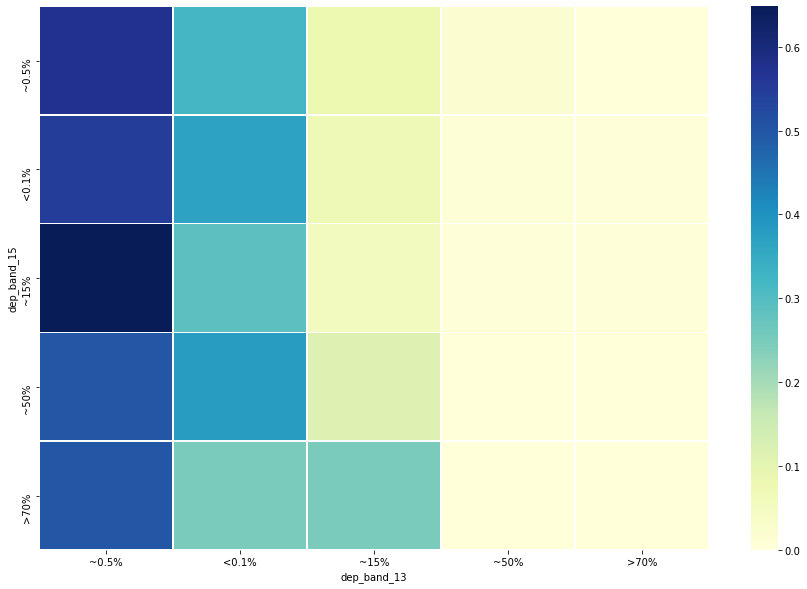

In [26]:
# A heatmap represents thee same table
k= correlation_table
plt.figure(figsize=(10*k.shape[1]/k.shape[0]*1.5,10*k.shape[0]/k.shape[1]))
sns.heatmap(correlation_table, linewidths=.5,cmap="YlGnBu")
plt.xlabel(x)
plt.ylabel(y)

# Feature engineering